In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import statsmodels.api as sm
import networkx as nx
import graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

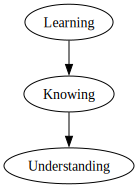

In [3]:
f = graphviz.Digraph()
f.edge("Learning", "Knowing")
f.edge("Knowing", "Understanding")
f

In [4]:
n = 1000  # sample size

# Simulating the variables
X = np.random.normal(0, 1, n)  # Learning
C = 5 * X + np.random.normal(0, 1, n)  # Knowing
Y = 3 * C + np.random.normal(0, 1, n)  # Understanding

df = pd.DataFrame()
df["X"] = X
df["C"] = C
df["Y"] = Y

df.head()


,X,C,Y
0,-0.431640,-1.500962,-3.603093
1,-0.328524,-2.844187,-7.849484
2,0.011900,-0.422809,-3.502503
3,0.935112,3.009365,9.121131
4,-0.980781,-3.981915,-13.040417


In [5]:
mod1 = bmb.Model("Y ~ X", df)
results1 = mod1.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:07.251938


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 876.77it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 877.32it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 877.98it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 878.59it/s]


Sampling time = 0:00:02.872404


Transforming variables...


Transformation time = 0:00:00.107426


Computing Log Likelihood...


Log Likelihood time = 0:00:00.234407


In [6]:
az.summary(results1, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.05,0.09,-0.13,0.22,0.0,0.0,3985.45,3167.76,1.0
X,15.15,0.10,14.96,15.33,0.0,0.0,4225.57,2982.37,1.0
Y_sigma,3.14,0.07,3.00,3.27,0.0,0.0,4559.15,2999.52,1.0


In [7]:
mod2 = bmb.Model("Y ~ X + C", df)

In [8]:
results2 = mod2.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.384673


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:  25%|█████████████▎                                       | 500/2000 [00:02<00:00, 4979.38it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:02<00:00, 4905.29it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 5691.04it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 5385.99it/s]

Running chain 2:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 5607.62it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 5684.20it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 5451.55it/s]

Running chain 1:  65%|█████████████████████████████████▊                  | 1300/2000 [00:02<00:00, 5802.84it/s]

Running chain 2:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 5421.11it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 5493.06it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:02<00:00, 5810.65it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 5097.09it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 756.44it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 756.80it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 757.27it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 757.69it/s]


Sampling time = 0:00:02.768291


Transforming variables...


Transformation time = 0:00:00.075193


Computing Log Likelihood...


Log Likelihood time = 0:00:00.193944


In [9]:
az.summary(results2, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.03,0.03,-0.02,0.09,0.0,0.0,2349.44,2500.77,1.0
X,0.16,0.16,-0.13,0.45,0.0,0.0,1596.22,2263.52,1.0
C,2.97,0.03,2.92,3.03,0.0,0.0,1624.25,2281.23,1.0
Y_sigma,0.99,0.02,0.95,1.03,0.0,0.0,2824.91,2442.59,1.0


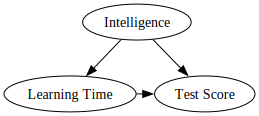

In [10]:
f = graphviz.Digraph()
with f.subgraph() as s:
    s.attr(rank='same')
    s.node("Learning Time")
    s.node("Test Score")

f.node("Intelligence")
f.edge("Intelligence", "Learning Time")
f.edge("Intelligence", "Test Score")
f.edge("Learning Time", "Test Score")

f

In [11]:
n = 1000  # sample size

# Simulating the variables
I = np.random.normal(100, 15, n)  # Intelligence
T = 200 - I + np.random.normal(0, 1, n)  # Learning Time
S = 0.5 * I + 0.1 * T + np.random.normal(0, 1, n)  # Test Score

df = pd.DataFrame()
df["I"] = I
df["T"] = T
df["S"] = S

df.head()

,I,T,S
0,109.593409,90.995814,64.159336
1,99.447025,100.283358,58.251657
2,133.618284,67.829285,74.657946
3,92.426888,108.674049,58.217999
4,95.019667,106.109241,60.030866


In [12]:
mod3 = bmb.Model("S ~ T", df)
results3 = mod3.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.106808


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:  80%|████████████████████████████████████████▊          | 1600/2000 [00:02<00:00, 15895.27it/s]

Running chain 2:  75%|██████████████████████████████████████▎            | 1500/2000 [00:02<00:00, 14794.62it/s]

Running chain 0:  80%|████████████████████████████████████████▊          | 1600/2000 [00:02<00:00, 15621.64it/s]

Running chain 3:  85%|███████████████████████████████████████████▎       | 1700/2000 [00:02<00:00, 16417.05it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 855.06it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 855.48it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 856.16it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 856.69it/s]


Sampling time = 0:00:02.456210


Transforming variables...


Transformation time = 0:00:00.062979


Computing Log Likelihood...


Log Likelihood time = 0:00:00.171508


In [13]:
az.summary(results3, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,99.69,0.23,99.27,100.13,0.0,0.0,5011.21,3305.28,1.0
T,-0.40,0.00,-0.40,-0.39,0.0,0.0,5177.52,3196.47,1.0
S_sigma,1.12,0.02,1.07,1.16,0.0,0.0,2926.09,2510.45,1.0


In [14]:
mod4 = bmb.Model("S ~ T + I", df)
results4 = mod4.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.047846


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:  10%|█████▎                                               | 200/2000 [00:02<00:00, 1953.55it/s]

Running chain 3:  10%|█████▎                                               | 200/2000 [00:02<00:00, 1803.92it/s]

Running chain 0:  15%|███████▉                                             | 300/2000 [00:02<00:00, 2126.75it/s]

Running chain 1:  15%|███████▉                                             | 300/2000 [00:02<00:00, 1942.03it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:02<00:00, 1886.01it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:02<00:00, 1872.28it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 2149.72it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 2106.56it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1936.03it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1874.54it/s]

Running chain 0:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 2360.43it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 2299.40it/s]

Running chain 2:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 2247.43it/s]

Running chain 3:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 2137.90it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 2267.44it/s]

Running chain 3:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 2078.69it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 2119.20it/s]

Running chain 2:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 2070.50it/s]

Running chain 3:  65%|█████████████████████████████████▊                  | 1300/2000 [00:02<00:00, 2021.95it/s]

Running chain 0:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2211.48it/s]

Running chain 1:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 2019.19it/s]

Running chain 2:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 1972.59it/s]

Running chain 3:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2005.86it/s]

Running chain 1:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:03<00:00, 1924.09it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:03<00:00, 1948.34it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:03<00:00, 2158.57it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:03<00:00, 1988.30it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:03<00:00, 1861.26it/s]

Running chain 2:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:03<00:00, 1913.15it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 1974.90it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 1843.00it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 1897.91it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 615.07it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 615.29it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 615.57it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 615.91it/s]


Sampling time = 0:00:03.376426


Transforming variables...


Transformation time = 0:00:00.071224


Computing Log Likelihood...


Log Likelihood time = 0:00:00.183346


In [15]:
az.summary(results4, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4.74,6.31,-16.50,6.59,0.17,0.12,1419.32,1607.38,1.0
T,0.12,0.03,0.07,0.18,0.00,0.00,1420.69,1580.90,1.0
I,0.52,0.03,0.47,0.58,0.00,0.00,1423.36,1595.39,1.0
S_sigma,0.98,0.02,0.94,1.02,0.00,0.00,2298.83,2071.99,1.0


In [16]:
n = 1000  # Sample Size
network = np.random.normal(size=n)
competence = np.random.normal(size=n)

promotion = ((network > 1) | (competence > 1)).astype(int)
luck = np.random.binomial(1, 0.05, size=n)
promotion = (1 - luck) * promotion + luck * (1 - promotion)

df = pd.DataFrame()
df["P"] = promotion
df["N"] = network
df["C"] = competence

df.head()

,P,N,C
0,1,1.261516,0.321216
1,0,-1.205124,-0.856350
2,0,2.144732,1.304337
3,0,0.356333,0.544822
4,1,-1.864715,1.055675


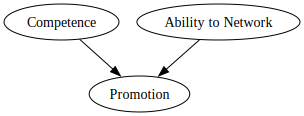

In [17]:
f = graphviz.Digraph()
f.edge("Competence", "Promotion")
f.edge("Ability to Network", "Promotion")
f

In [18]:
mod5 = bmb.Model("C ~ N", df)
results5 = mod5.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.301234


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 931.72it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 932.19it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 933.00it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 933.70it/s]


Sampling time = 0:00:02.262344


Transforming variables...


Transformation time = 0:00:00.063167


Computing Log Likelihood...


Log Likelihood time = 0:00:00.173593


In [19]:
az.summary(results5, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.00,0.03,-0.06,0.06,0.0,0.0,4028.98,3040.04,1.0
N,0.01,0.03,-0.05,0.07,0.0,0.0,4331.91,3017.15,1.0
C_sigma,0.99,0.02,0.95,1.03,0.0,0.0,3395.90,2891.86,1.0


In [20]:
mod6 = bmb.Model("C ~ N + P", df)
results6 = mod6.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.206336


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 860.32it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 860.71it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 861.28it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 861.93it/s]


Sampling time = 0:00:02.445954


Transforming variables...


Transformation time = 0:00:00.070855


Computing Log Likelihood...


Log Likelihood time = 0:00:00.184759


In [21]:
az.summary(results6, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.30,0.03,-0.36,-0.23,0.0,0.0,3874.00,3012.55,1.0
N,-0.18,0.03,-0.23,-0.12,0.0,0.0,3691.68,3318.64,1.0
P,0.96,0.07,0.84,1.09,0.0,0.0,3523.11,2785.63,1.0
C_sigma,0.90,0.02,0.86,0.94,0.0,0.0,4017.40,3166.77,1.0


In [22]:
only_promoted = df.loc[df["P"] == 1]

In [23]:
mod7 = bmb.Model("C ~ N", only_promoted)
results7 = mod7.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.135448


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:02<?, ?it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 961.20it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 961.74it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 962.50it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 963.19it/s]


Sampling time = 0:00:02.194279


Transforming variables...


Transformation time = 0:00:00.062073


Computing Log Likelihood...


Log Likelihood time = 0:00:00.184178


In [24]:
az.summary(results7, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.81,0.06,0.69,0.93,0.0,0.0,4072.52,3004.53,1.0
N,-0.41,0.05,-0.51,-0.31,0.0,0.0,4043.70,2991.18,1.0
C_sigma,0.99,0.04,0.92,1.07,0.0,0.0,3881.98,3022.81,1.0


In [25]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Tue Jan 30 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

networkx   : 3.2.1
numpy      : 1.26.2
scipy      : 1.11.4
pandas     : 2.1.4
seaborn    : 0.13.0
pymc       : 5.10.3
bambi      : 0.13.0
graphviz   : 0.20.1
statsmodels: 0.14.1
matplotlib : 3.8.2
arviz      : 0.17.0

Watermark: 2.4.3

